# Testing the AMF

## Generating a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, random_state=1)
print(X.shape, y.shape)
print(np.unique(y))

(100, 2) (100,)
[0 1 2]


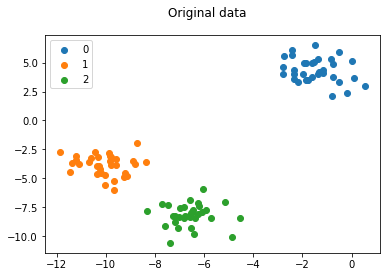

In [2]:
def plot_classes(X, y, title=None):
    fig, axs = plt.subplots()

    for c in np.unique(y):
        indexes = np.where(y == c)
        X_reduced = X[indexes]
        if len(X_reduced) == 0:
            print(f"No value found for class {c}")
            continue
        axs.scatter(X_reduced[:,0], X_reduced[:,1], label=str(c))

    axs.legend()
    if title is not None:
        fig.suptitle(title)

plot_classes(X, y, "Original data")

## Using the AMFClassifier

### Checking Onelearn results first

In [3]:
from onelearn import AMFClassifier as AMFClassifierOnelearn

amf_base = AMFClassifierOnelearn(
    n_classes=len(np.unique(y)),
    n_estimators=10,
    step=1.0,
    loss="log",
    use_aggregation=True,
    dirichlet=0.1,
    random_state=1,
)

amf_base.partial_fit_helper(X, y)

AMFClassifier(n_classes=3, n_estimators=10, step=1.0, loss='log', use_aggregation=True, dirichlet=0.1, split_pure=False, n_jobs=1, random_state=1, verbose=False)

3


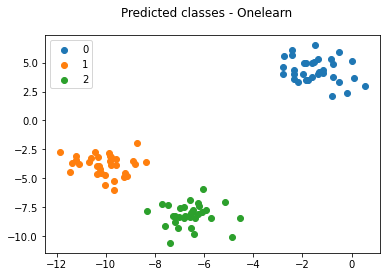

In [4]:
y_pred = amf_base.predict_proba(X)
y_pred = np.argmax(y_pred, axis=1)
plot_classes(X, y_pred, "Predicted classes - Onelearn")

### Running our AMF implementation in River

In [5]:
from river.ensemble.aggregated_mondrian_forest import AMFClassifier

amf = AMFClassifier(
    n_classes=len(np.unique(y)),
    n_estimators=10,
    step=1.0,
    loss="log",
    use_aggregation=True,
    dirichlet=0.1,
    random_state=1,
)

amf.partial_fit_helper(X, y)

AMFClassifier(n_classes=3, n_estimators=10, step=1.0, loss='log', use_aggregation=True, dirichlet=0.1, split_pure=False, n_jobs=1, random_state=1, verbose=False)

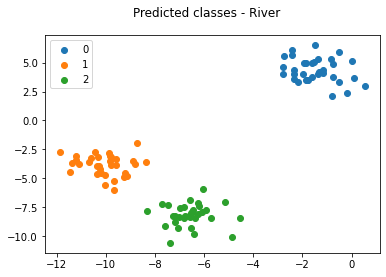

In [6]:
y_pred = amf.predict_proba(X)
y_pred = np.argmax(y_pred, axis=1)
plot_classes(X, y_pred, "Predicted classes - River")